# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Описание проекта
<a id="id_description"></a>

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

**Цель**

Построить модель для задачи классификации, которая выберет подходящий тариф для клиентов

**Инструкция по выполнению проекта**

   - Откройте файл с данными и изучите его. Путь к файлу: `datasets/users_behavior.csv`.
   - Разделите исходные данные на обучающую, валидационную и тестовую выборки.
   - Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.
   - Проверьте качество модели на тестовой выборке.
   - Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.

**Описание данных**

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

    сalls — количество звонков,
    minutes — суммарная длительность звонков в минутах,
    messages — количество sms-сообщений,
    mb_used — израсходованный интернет-трафик в Мб,
    is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).


## Откройте и изучите файл

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


## Разбейте данные на выборки

In [6]:
features=df.drop(columns=['is_ultra'])
target=df['is_ultra']

In [7]:
features_train, features_test, target_train, target_test = train_test_split(
    features,target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train,target_train, test_size=0.25, random_state=12345)

In [8]:
list(map(len,(features,features_train,features_valid,features_test)))

[3214, 1928, 643, 643]

In [9]:
df.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

В исходных данных всего 3214 записи. Мы сделали выборки со следущими размерами:
- 1928 записей для обучения
- 643 записей для валидации
- 643 записи для тестирования

Целевой признак (тариф) задан в колонке 'is_ultra' поэтому мы ее записываем в таблицу `target`,  а из данных данных по признакам `features` мы убираем эту колонку. 

И так, по признакам кол-во звонков 'calls', длительности разговоров 'minutes', кол-ву сообщений 'messages', и количество трафика интернет 'mb_used', мы строим модели предсказывающие целевой признак - тариф 'is_ultra`.

## Исследуйте модели

Рассмотрим три модели : 'Решающее дерево', 'Случайный лес' и 'Логическая регресия' с произвольно выбранными параметрами

In [10]:
model_1 = DecisionTreeClassifier(random_state=12345, max_depth=5)
model_2 = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=5)
model_3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=800) 
models=[model_1,model_2,model_3]

In [11]:
for m in models:
    m.fit(features_train,target_train)
predictions=[]
scores=[]
for m in models:
    predictions.append(m.predict(features_test))
    scores.append(m.score(features_valid,target_valid))

Доля правильных ответов составляет для тех моделей дана в следущем списке:

In [12]:
scores

[0.7589424572317263, 0.7776049766718507, 0.7262830482115086]

Далее рассмотрим детально каждую можель по отдельности:

### Дерево решений - Decision Tree   

In [13]:
depth_list=range(1,38)
criterion_list=['gini', 'entropy']  #, 'log_loss']
min_samples_leaf_list=range(1,7)
hyperpareter_list=[(c,d,m) for c in criterion_list for d in depth_list for m in min_samples_leaf_list]
#print(len(criterion_list),len(depth_list),len(min_samples_leaf_list))
print('Кол-во моделей равно ', len(hyperpareter_list))

Кол-во моделей равно  444


In [14]:
predictions=[]
scores=[]
for criterion, depth, leaf in hyperpareter_list:
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth,criterion=criterion,min_samples_leaf=leaf)
    model.fit(features_train,target_train)
    predictions.append(model.predict(features_test))
    scores.append(model.score(features_valid,target_valid))

In [15]:
print('Best criteria, depth, min_samples_leaf are', hyperpareter_list[scores.index(max(scores))])
print('Best score value', max(scores))

Best criteria, depth, min_samples_leaf are ('entropy', 8, 6)
Best score value 0.7931570762052877


Мы расмотрели 444 моделей варьируя три гиперпараметра - максимальную глубину деревьев, критерий и минимальное число ветвлений.

### Random Forest

In [16]:
n_est_list=list(range(1,5))+list(range(5,41,2))
depth_list=range(1,26,2)
hyperpareter_list=[(est,depth) for est in n_est_list for depth in depth_list]

In [17]:
parameters_grid = { 
    'n_estimators': [1,5,35],  #n_est_list
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,3,9,12],  #depth_list,
    'criterion' :['gini', 'entropy']
}

model = RandomForestClassifier(random_state=12345)
cv_forest = GridSearchCV(estimator=model, param_grid=parameters_grid , cv= 5)
cv_forest.fit(features_train,target_train)
cv_forest.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 35}

In [18]:
best_param_forest={'criterion': 'gini',
     'max_depth': 9,
     'max_features': 'auto',
     'n_estimators': 35};

In [19]:
model_forest = RandomForestClassifier(random_state=12345,**best_param_forest) #**p)
model_forest.fit(features_train,target_train)
print('Точность модели на обучающей выборке составляет: ', model_forest.score(features_test,target_test))

Точность модели на обучающей выборке составляет:  0.7947122861586314


In [20]:
predictions=[]
scores=[]
for est, depth in hyperpareter_list:
    model = RandomForestClassifier(random_state=12345,
                                   n_estimators=est, max_depth=depth,
                                   criterion='gini', 
                                   max_features='auto')
    model.fit(features_train,target_train)
    predictions.append(model.predict(features_test))
    scores.append(model.score(features_valid,target_valid))

In [21]:
H=np.reshape(scores, (len(n_est_list), len(depth_list)))

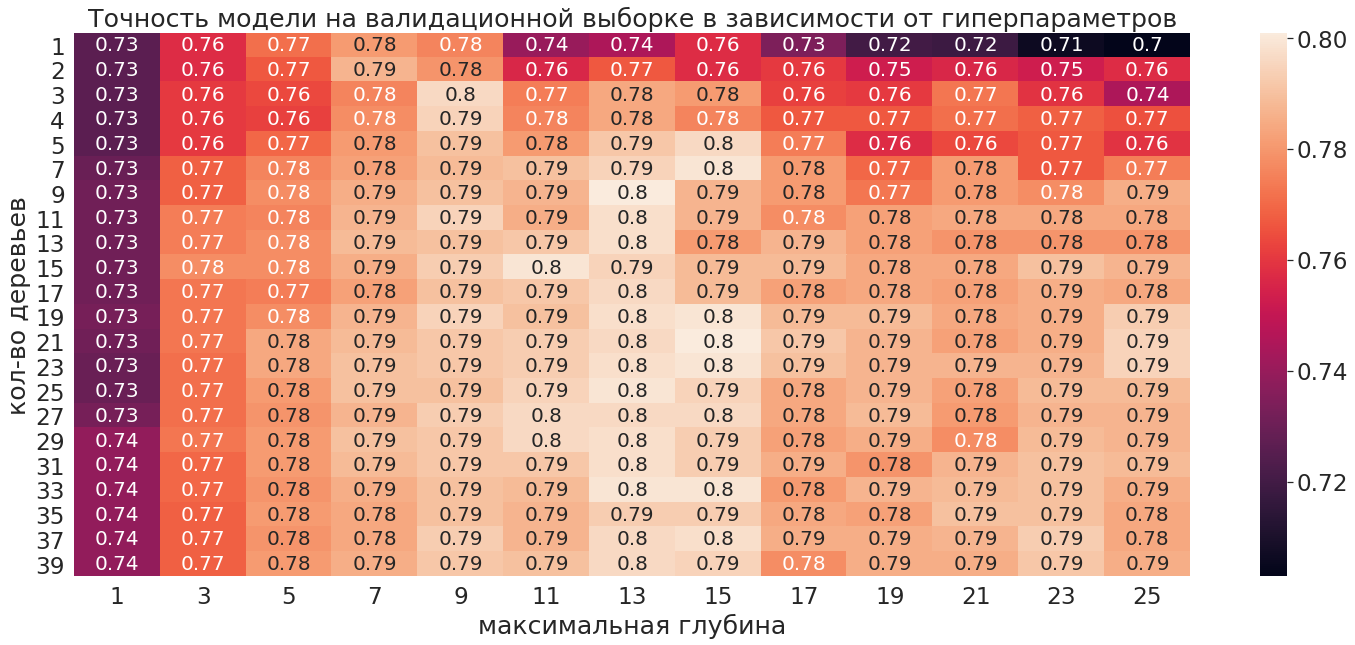

In [22]:
sns.set(font_scale=2.1)
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(H, annot=True,  annot_kws={"size": 20}, yticklabels=list(n_est_list),xticklabels=list(depth_list))
plt.ylabel('кол-во деревьев');
plt.xlabel('максимальная глубина');
ax.set_title('Точность модели на валидационной выборке в зависимости от гиперпараметров');

И так мы рассмотрели четырехпараметрическое множество моделей варьируя глубину, кол-во деревьев, критерий оценки и максимальное кол-во празнаков. Оптимальные значения даны ниже

In [23]:
cv_forest.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 35}

In [24]:
model_forest = RandomForestClassifier(random_state=12345,**cv_forest.best_params_) #**p)
model_forest.fit(features_train,target_train)
print('Точность модели на обучающей выборке составляет: ', model_forest.score(features_test,target_test))

Точность модели на обучающей выборке составляет:  0.7947122861586314


### Logistic Regression

In [25]:
solver_list=['newton-cg',
             'lbfgs', 'liblinear', 'sag', 'saga']
max_iter_list=list(range(1,101,10))+list(range(200,1001,200)) #+list(range(2000,10001,1000))
hyperpareter_list=[(s,m) for s in solver_list for m in max_iter_list]
print(len(solver_list),len(max_iter_list))

5 15


{'lbfgs':['l2', None],'liblinear':['l1', 'l2'], 'newton-cg':['l2', None],'newton-cholesky':['l2', None],
'sag':['l2', None],'saga':['elasticnet', 'l1', 'l2', None]}

In [26]:
len(hyperpareter_list)

75

pip install optuna/ import optuna/from sklearn.model_selection import cross_val_score

In [27]:
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always')

In [28]:
parameters_grid = {
    'solver' : solver_list,
    'max_iter' : max_iter_list,
    #'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]
    #'penalty': ['l1','l2'], 
    'C': [0.1,1,10]
}

model = LogisticRegression(random_state=12345)
cv_log_reg = GridSearchCV(estimator=model, param_grid=parameters_grid , cv= 5)
cv_log_reg.fit(features_train,target_train)
cv_log_reg.best_params_

{'C': 0.1, 'max_iter': 51, 'solver': 'newton-cg'}

In [30]:
best_params_log_reg={'C': 0.1, 'max_iter': 51, 'solver': 'newton-cg'}

In [31]:
model_log_reg = LogisticRegression(random_state=12345,**cv_log_reg.best_params_) #**p)
model_log_reg.fit(features_train,target_train)
print('Точность модели на обучающей выборке составляет: ', model_log_reg.score(features_train,target_train))
print('Точность модели на валидационной выборке составляет: ',model_log_reg.score(features_valid,target_valid))
print('Точность модели на тестовой выборке составляет: ',model_log_reg.score(features_test,target_test))

Точность модели на обучающей выборке составляет:  0.7510373443983402
Точность модели на валидационной выборке составляет:  0.7278382581648523
Точность модели на тестовой выборке составляет:  0.76049766718507


In [32]:
predictions=[]
scores=[]
for solver, m_i in hyperpareter_list:
    model = LogisticRegression(random_state=12345, C=0.1, solver=solver, max_iter=m_i) 
    model.fit(features_train,target_train)
    predictions.append(model.predict(features_test))
    scores.append(model.score(features_valid,target_valid))

In [33]:
H=np.reshape(scores, (len(solver_list),len(max_iter_list)))

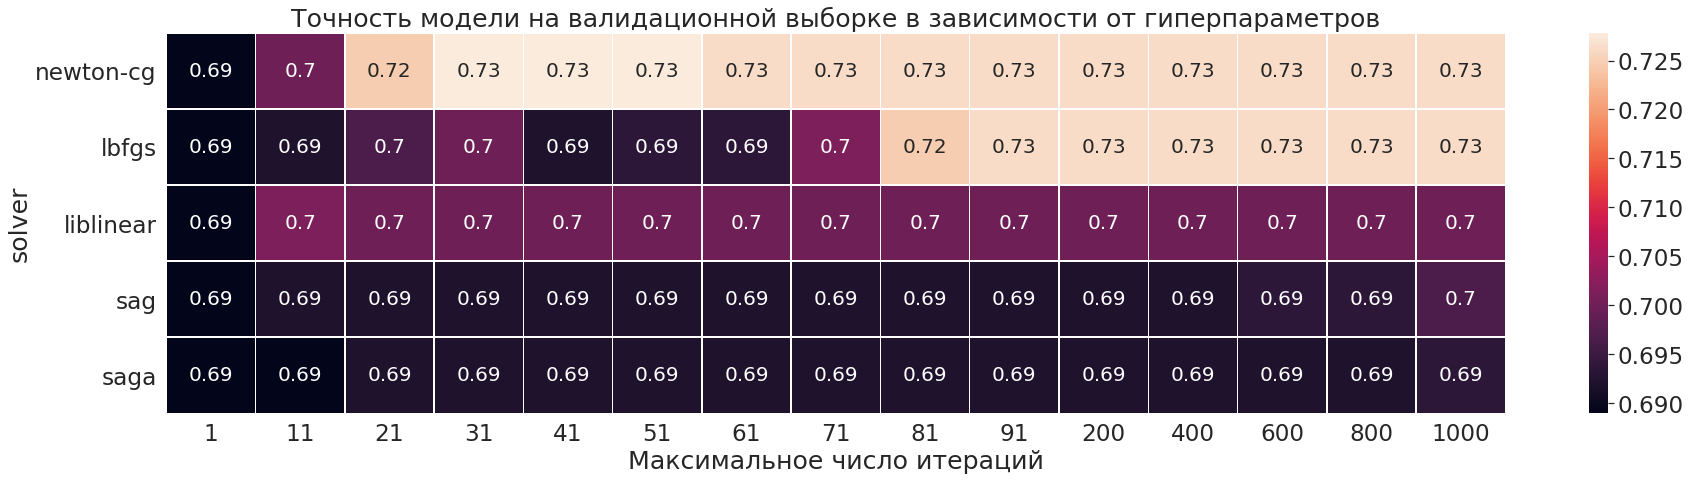

In [34]:
sns.set(font_scale=2.1)
fig, ax = plt.subplots(figsize=(30,7)) 
sns.heatmap(H, annot=True,  annot_kws={"size": 20}, yticklabels=solver_list,xticklabels=max_iter_list, linewidths=.5)
plt.ylabel('solver');
plt.xlabel('Максимальное число итераций');
ax.set_title('Точность модели на валидационной выборке в зависимости от гиперпараметров')
plt.show()

In [35]:
cv_log_reg.best_params_

{'C': 0.1, 'max_iter': 51, 'solver': 'newton-cg'}

Мы проварьировали тип решателя 'solver', максимальное кол-во итераций и обратную силу регулизации. Наиточнейший результат показал решатель 'newton-cg' c максимальным числом итераций 51. В целом модели 'newton-cg' и 'lbfgs' показывают схожие результаты с кол-вом макс. итераций выше 71. Параметр обратной силы регулязации `C` равен 0.1.

## Проверьте модель на тестовой выборке

In [36]:
model = DecisionTreeClassifier(random_state=12345,criterion = 'entropy', max_depth=8, min_samples_leaf= 7)
model.fit(features_train,target_train)
predictions.append(model.predict(features_test))
model_1_score=model.score(features_test,target_test)

In [37]:
model = RandomForestClassifier(random_state=12345, **best_param_forest) 
model.fit(features_train,target_train)
predictions.append(model.predict(features_test))
model_2_score=model.score(features_test,target_test)

In [38]:
model = LogisticRegression(random_state=12345, **best_params_log_reg) 
model.fit(features_train,target_train)
predictions.append(model.predict(features_test))
model_3_score = model.score(features_test,target_test)

In [39]:
print('Доля правильных результатов для отобранных моделей :')
print('Решающее дерево:', model_1_score)
print('Случайный лес:', model_2_score)
print('Логическая регресиия:', model_3_score)

Доля правильных результатов для отобранных моделей :
Решающее дерево: 0.7853810264385692
Случайный лес: 0.7947122861586314
Логическая регресиия: 0.76049766718507


Выводы: 
- мы разбили данные на три части: тестовую, валидационную и на тренивовочную выборку
- рассмотрели три класа моделей
- для каждой модели мы проварьвовали гиперпараметры и наши опитимальный. 
- получили три модели который предсказывают результат с точностью 75 -79%

## (бонус) Проверьте модели на адекватность

In [40]:
1-df['is_ultra'].mean()

0.693528313627878

In [41]:
1-target_test.mean()

0.6951788491446345

Доля тарифа 'Смарт' в данных составляет ~70%. Таким образом наипростейшая адекватная модель будет всегда предсказывать наиболее частый результат бинарной классификации с точностью ~70%. Т.е. любая модель с меньшей точностью заведома не адекватна. *Построенные модели адекватны поскольку их точность выше 70% и составляет ~76-80% .*

Спасибо за ссылки и замечания!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
